# Import library

In [1]:
import os
import re
import subprocess
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt

# Check MSA quality
To get the quality of multiple alignment, we are looking at the average identity and ratio of sequence. The average is made out of all alignment column value. The measure of quality is plotted against the length of the alignment.

In [2]:
LengthAlignment = {}

files = subprocess.check_output("ls /home/anais/Documents/Projet/G4Evolution/gapFamOrtho/", shell=True)
files = files.decode("utf-8")
files = files[:-1]
for file in files.split('\n'):
    tree = file.split('.')[0]
    with open("/home/anais/Documents/Projet/G4Evolution/ProcessedAlignOrtho/"+tree+".csv") as f:
        content = f.read()
        content = content.split('\n')
    length = len(content)
    LengthAlignment[tree] = length -1

In [3]:
Dico = {'Identity': [], 'RatioSeq': [], 'NbGene':[], 'Tree': []}

# dicoSpGrp = {'pan_troglodytes' : 'Eukaryota', 'homo_sapiens' : 'Eukaryota', 'pongo_abelii' : 'Eukaryota', 'mus_musculus' : 'Eukaryota', 'monodelphis_domestica' : 'Eukaryota', 'ornithorhynchus_anatinus' : 'Eukaryota', 'anolis_carolinensis' : 'Eukaryota', 'gallus_gallus' : 'Eukaryota', 'danio_rerio' : 'Eukaryota', 'gasterosteus_aculeatus' : 'Eukaryota', 'drosophila_melanogaster' : 'Eukaryota', 'apis_mellifera' : 'Eukaryota', 'caenorhabditis_elegans' : 'Eukaryota', 'neurospora_crassa' : 'Eukaryota', 'aspergillus_nidulans' : 'Eukaryota', 'saccharomyces_cerevisiae' : 'Eukaryota', 'schizosaccharomyces_pombe' : 'Eukaryota', 'dictyostelium_discoideum' : 'Eukaryota', 'arabidopsis_thaliana' : 'Eukaryota', 'vitis_vinifera' : 'Eukaryota', 'solanum_lycopersicum' : 'Eukaryota', 'oryza_sativa' : 'Eukaryota', 'physcomitrella_patens' : 'Eukaryota', 'chlamydomonas_reinhardtii' : 'Eukaryota', 'leishmania_major' : 'Eukaryota', 'methanosarcina_acetivorans_c2a' : 'Archaea', 'halobacterium_salinarum_r1' : 'Archaea', 'hyperthermus_butylicus_dsm_5456' : 'Archaea', 'archaeoglobus_fulgidus_dsm_4304' : 'Archaea', 'methanobrevibacter_smithii_atcc_35061' : 'Archaea', 'pyrococcus_horikoshii_ot3' : 'Archaea', 'thermoplasma_acidophilum_dsm_1728' : 'Archaea', 'sulfolobus_solfataricus_p2' : 'Archaea', 'pyrobaculum_aerophilum_str_im2' : 'Archaea', 'nanoarchaeum_equitans_kin4_m' : 'Archaea', 'candidatus_korarchaeum_cryptofilum_opf8' : 'Archaea', 'cenarchaeum_symbiosum_a' : 'Archaea', 'aquifex_aeolicus_vf5' : 'Bacteria', 'mycoplasma_pneumoniae_m129' : 'Bacteria', 'staphylococcus_aureus_subsp_aureus_n315' : 'Bacteria', 'bacillus_subtilis_subsp_subtilis_str_168' : 'Bacteria', 'enterococcus_faecalis_v583' : 'Bacteria', 'streptococcus_pneumoniae_tigr4' : 'Bacteria', 'chloroflexus_aurantiacus_j_10_fl' : 'Bacteria', 'mycobacterium_tuberculosis_h37rv' : 'Bacteria', 'thermus_thermophilus_hb8' : 'Bacteria', 'chlamydia_trachomatis_d_uw_3_cx' : 'Bacteria', 'borrelia_burgdorferi_b31' : 'Bacteria', 'campylobacter_jejuni_subsp_jejuni_nctc_11168_atcc_700819' : 'Bacteria', 'myxococcus_xanthus_dk_1622' : 'Bacteria', 'geobacter_sulfurreducens_pca' : 'Bacteria', 'wolbachia_endosymbiont_of_drosophila_melanogaster' : 'Bacteria', 'anaplasma_phagocytophilum_str_hz' : 'Bacteria', 'brucella_abortus_bv_1_str_9_941' : 'Bacteria', 'neisseria_meningitidis_z2491' : 'Bacteria', 'legionella_pneumophila_str_paris' : 'Bacteria', 'francisella_tularensis_subsp_tularensis_schu_s4' : 'Bacteria', 'vibrio_cholerae_o1_biovar_el_tor_str_n16961' : 'Bacteria', 'haemophilus_influenzae_rd_kw20' : 'Bacteria', 'yersinia_pestis_biovar_microtus_str_91001' : 'Bacteria', 'escherichia_coli_str_k_12_substr_mg1655' : 'Bacteria'}

for t in LengthAlignment:
    try:
        #read processed alignment
        df = pd.read_csv('/home/anais/Documents/Projet/G4Evolution/ProcessedAlignOrtho/'+t+'.csv', sep='\t')
    except:
        #it is possible that some trees didn't had their alignment
        #and or the processing of the alignment
        print('No Ali/Proce : ', tree)
    else:
        #get the number of genes in a tree
        with open("/home/anais/Documents/Projet/G4Evolution/listGrpOrtho/"+t+".txt") as f:
            content = f.read()
            content = content.split('\n')
        length = len(content)
        Dico['NbGene'].append(length) #nb gene for this tree
        Dico['Tree'].append(t) #tree identifier
        Dico['RatioSeq'].append(df['RatioSeq'][0:-1].mean()) #get the ratio of sequence
        Dico['Identity'].append(df['Identiy'][0:-1].mean()) #get the ratio of sequence
        #(for each column we compute the nb of gap on the number of tot sequences)

/home/anais/software/projectsVp3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/anais/software/projectsVp3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/anais/software/projectsVp3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/anais/software/projectsVp3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  h

/home/anais/software/projectsVp3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/anais/software/projectsVp3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/anais/software/projectsVp3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/anais/software/projectsVp3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  

In [4]:
dfQuality = pd.DataFrame(data=Dico)
dfQuality

,Identity,RatioSeq,NbGene,Tree
0,0.930884,0.070457,44,grpOrtho_0
1,0.878122,0.175512,21,grpOrtho_10000
2,0.594287,0.837006,19,grpOrtho_10001
3,0.777692,0.251327,17,grpOrtho_1000
4,0.886289,0.135473,25,grpOrtho_10010
...,...,...,...,...
4755,0.815161,0.252641,28,grpOrtho_9995
4756,0.584972,0.879891,12,grpOrtho_9996
4757,0.712423,0.315892,24,grpOrtho_999
4758,0.890400,0.138213,23,grpOrtho_99


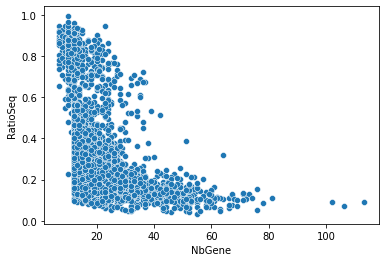

In [5]:
sns.scatterplot(data=dfQuality, x="NbGene", y="RatioSeq")
plt.show()

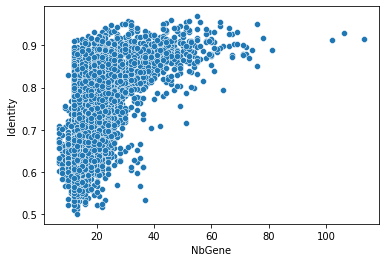

In [6]:
sns.scatterplot(data=dfQuality, x="NbGene", y="Identity")
plt.show()

In [7]:
dfQuality = dfQuality[dfQuality.RatioSeq >=0.50]
dfQuality

,Identity,RatioSeq,NbGene,Tree
2,0.594287,0.837006,19,grpOrtho_10001
6,0.563683,0.725451,13,grpOrtho_10013
7,0.619161,0.912807,14,grpOrtho_10016
9,0.681933,0.577658,25,grpOrtho_10022
12,0.646365,0.863689,12,grpOrtho_10027
...,...,...,...,...
4749,0.662251,0.563013,13,grpOrtho_9980
4751,0.628164,0.938611,13,grpOrtho_9982
4752,0.687586,0.866946,14,grpOrtho_9988
4756,0.584972,0.879891,12,grpOrtho_9996


Plus il y a de gènes, plus l'identité est forte mais moins il y a de nucléotides dans les colonnes des alignements, car ce sont les gaps qui sont conservés. De ce fait, on ne garde que les alignements dont la moyenne des ratio est supérieures à 50%. Cette valeur est choisi car il semble il y a avoir une séparation entre les alignements. Seuls 691 des 4760 alignements sont gardés. Cela est peu mais permet de travailler avec un jeu de données plus petit et de bonne qualité.

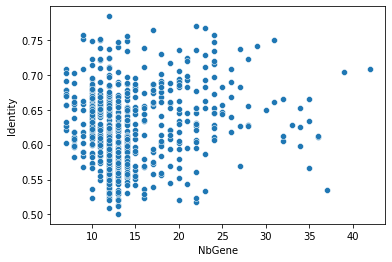

In [8]:
sns.scatterplot(data=dfQuality, x="NbGene", y="Identity")
plt.show()

On peut voir que dans les alignements filtrés, tous sont au dessus de 50% d'identité, ce qui est plutôt bon.
## Get nb gene by species
For that we need to get the dico that give the species name from the gene ID, then we go throught the list of grp and check the files with the gene id of a specific grp.

In [11]:
dicoGeneListbySp = {}
listSp = ['bacillus_subtilis_subsp_subtilis_str_168', 'francisella_tularensis_subsp_tularensis_schu_s4', 'leishmania_major', 'pongo_abelii', 'saccharomyces_cerevisiae', 'wolbachia_endosymbiont_of_drosophila_melanogaster', 'anaplasma_phagocytophilum_str_hz', 'pyrococcus_horikoshii_ot3', 'chlamydomonas_reinhardtii', 'vitis_vinifera', 'mus_musculus', 'mycobacterium_tuberculosis_h37rv', 'solanum_lycopersicum', 'neurospora_crassa', 'drosophila_melanogaster', 'geobacter_sulfurreducens_pca', 'sulfolobus_solfataricus_p2', 'cenarchaeum_symbiosum_a', 'streptococcus_pneumoniae_tigr4', 'gasterosteus_aculeatus', 'gallus_gallus', 'chlamydia_trachomatis_d_uw_3_cx', 'apis_mellifera', 'hyperthermus_butylicus_dsm_5456', 'borrelia_burgdorferi_b31', 'legionella_pneumophila_str_paris', 'homo_sapiens', 'pan_troglodytes', 'schizosaccharomyces_pombe', 'arabidopsis_thaliana', 'pyrobaculum_aerophilum_str_im2', 'caenorhabditis_elegans', 'archaeoglobus_fulgidus_dsm_4304', 'thermus_thermophilus_hb8', 'oryza_sativa', 'myxococcus_xanthus_dk_1622', 'methanobrevibacter_smithii_atcc_35061', 'aquifex_aeolicus_vf5', 'mycoplasma_pneumoniae_m129', 'thermoplasma_acidophilum_dsm_1728', 'escherichia_coli_str_k_12_substr_mg1655', 'neisseria_meningitidis_z2491', 'danio_rerio', 'campylobacter_jejuni_subsp_jejuni_nctc_11168_atcc_700819', 'enterococcus_faecalis_v583', 'ornithorhynchus_anatinus', 'halobacterium_salinarum_r1', 'physcomitrella_patens', 'haemophilus_influenzae_rd_kw20', 'candidatus_korarchaeum_cryptofilum_opf8', 'methanosarcina_acetivorans_c2a', 'yersinia_pestis_biovar_microtus_str_91001', 'staphylococcus_aureus_subsp_aureus_n315', 'brucella_abortus_bv_1_str_9_941', 'anolis_carolinensis', 'monodelphis_domestica', 'chloroflexus_aurantiacus_j_10_fl', 'aspergillus_nidulans', 'nanoarchaeum_equitans_kin4_m', 'vibrio_cholerae_o1_biovar_el_tor_str_n16961', 'dictyostelium_discoideum']
for path, dirs, files in os.walk('/home/anais/Documents/Projet/G4Evolution/Homology/'):
    # for each element of the directory to passed
    for filename in files: # for each files
        if 'txt' in filename:
            inputfile = '/home/anais/Documents/Projet/G4Evolution/Homology/' + filename
            sp = filename.split('.')[0]
            if sp in listSp:
                with open(inputfile) as f:
                    content = f.read()
                    lines = content.split('\n')
                    for l in lines:
                        dicoGeneListbySp[l] = sp

In [13]:
dicoSpCountGene = {}
for grpOrtho in list(set(dfQuality.Tree)):
    with open("/home/anais/Documents/Projet/G4Evolution/listGrpOrtho/"+grpOrtho+".txt") as f:
        content = f.read()
        content = content.split('\n')
        for g in content:
            if g in dicoGeneListbySp:
                sp = dicoGeneListbySp[g]
                if sp not in dicoSpCountGene:
                    dicoSpCountGene[sp] = []
                dicoSpCountGene[sp].append(g)
for sp in dicoSpCountGene:
    print(sp)
    print('\t', len(list(set(dicoSpCountGene[sp]))) )

archaeoglobus_fulgidus_dsm_4304
	 204
thermus_thermophilus_hb8
	 219
myxococcus_xanthus_dk_1622
	 282
pyrococcus_horikoshii_ot3
	 188
nanoarchaeum_equitans_kin4_m
	 51
candidatus_korarchaeum_cryptofilum_opf8
	 160
bacillus_subtilis_subsp_subtilis_str_168
	 278
thermoplasma_acidophilum_dsm_1728
	 162
yersinia_pestis_biovar_microtus_str_91001
	 350
chloroflexus_aurantiacus_j_10_fl
	 269
hyperthermus_butylicus_dsm_5456
	 166
halobacterium_salinarum_r1
	 173
aquifex_aeolicus_vf5
	 199
escherichia_coli_str_k_12_substr_mg1655
	 348
pyrobaculum_aerophilum_str_im2
	 179
sulfolobus_solfataricus_p2
	 161
enterococcus_faecalis_v583
	 213
anolis_carolinensis
	 115
caenorhabditis_elegans
	 92
gasterosteus_aculeatus
	 184
pongo_abelii
	 221
homo_sapiens
	 226
danio_rerio
	 224
pan_troglodytes
	 223
ornithorhynchus_anatinus
	 28
drosophila_melanogaster
	 154
dictyostelium_discoideum
	 34
gallus_gallus
	 219
monodelphis_domestica
	 203
mus_musculus
	 222
campylobacter_jejuni_subsp_jejuni_nctc_11168_at

# Check gap between families

In [9]:
grpSpNormalized = []

treesLength = {}

files = subprocess.check_output("ls /home/anais/Documents/Projet/G4Evolution/gapFamOrtho/", shell=True)
files = files.decode("utf-8")
for file in files.split('\n'):
    if file != '':
        if file.split('.')[0] in list(set(dfQuality['Tree'])):
            content = subprocess.check_output('cat /home/anais/Documents/Projet/G4Evolution/gapFamOrtho/'+file, shell=True)
            content = content.decode("utf-8")
            content = content.split('\n')
            if content[-1] == '':
                content = content[:-1]
            content = [int(x) for x in content]
            treesLength[file.split('.')[0]] = {'Gaps': content}

In [10]:
for t in treesLength:
    nbLines = subprocess.check_output("cat /home/anais/Documents/Projet/G4Evolution/ProcessedAlignOrtho/"+t+".csv | wc", shell=True)
    nbLines = nbLines.decode("utf-8")
    try:
        length = int(nbLines.split(' ')[3])
    except:
        try:
            length = int(nbLines.split(' ')[4])
        except:
            try:
                length = int(nbLines.split(' ')[5])
            except:
                try:
                    length = int(nbLines.split(' ')[0])
                except:
                    print(t)
                    print(nbLines.split(' '))

    treesLength[t].update({'normGaps' : [x / length * 100 for x in treesLength[t]['Gaps']]})

files = subprocess.check_output("ls /home/anais/Documents/Projet/G4Evolution/gapFamOrtho/", shell=True)
files = files.decode("utf-8")
for file in files.split('\n'):
    if file != '':
        t = file.split('.')[0]
        if t in list(set(dfQuality['Tree'])):
            grpSpNormalized.extend(treesLength[t]['normGaps'])
                    
# pprint(trees)
# pprint(grpSp)

/home/anais/software/projectsVp3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


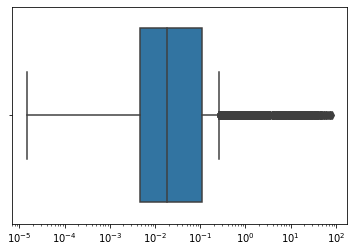

In [11]:
sns.boxplot(grpSpNormalized)
plt.xscale('log')
plt.show()

Il semble que toutes les familles soient assez éloignées les unes des autres, donc on fait une 'petite' fusion.

| Group         | threshold wind  |
|---------------|-----------------|
| Tous          | 0.001%          |

In [12]:
list(dfQuality.Tree)

['grpOrtho_10001',
 'grpOrtho_10013',
 'grpOrtho_10016',
 'grpOrtho_10022',
 'grpOrtho_10027',
 'grpOrtho_10030',
 'grpOrtho_10031',
 'grpOrtho_10033',
 'grpOrtho_10034',
 'grpOrtho_10039',
 'grpOrtho_10040',
 'grpOrtho_10041',
 'grpOrtho_10042',
 'grpOrtho_10050',
 'grpOrtho_10051',
 'grpOrtho_10052',
 'grpOrtho_10056',
 'grpOrtho_10058',
 'grpOrtho_10059',
 'grpOrtho_10066',
 'grpOrtho_10068',
 'grpOrtho_10069',
 'grpOrtho_10076',
 'grpOrtho_10089',
 'grpOrtho_100',
 'grpOrtho_10102',
 'grpOrtho_10113',
 'grpOrtho_10114',
 'grpOrtho_10118',
 'grpOrtho_10124',
 'grpOrtho_10128',
 'grpOrtho_10129',
 'grpOrtho_10130',
 'grpOrtho_10136',
 'grpOrtho_10141',
 'grpOrtho_10143',
 'grpOrtho_10144',
 'grpOrtho_10147',
 'grpOrtho_10149',
 'grpOrtho_10150',
 'grpOrtho_10153',
 'grpOrtho_10156',
 'grpOrtho_10159',
 'grpOrtho_10161',
 'grpOrtho_10166',
 'grpOrtho_10167',
 'grpOrtho_10169',
 'grpOrtho_10172',
 'grpOrtho_10174',
 'grpOrtho_10176',
 'grpOrtho_10177',
 'grpOrtho_10182',
 'grpOrtho_101

# Curent work

In [13]:
#dico to rename species for the output file. This step
#is necessary otherwise count can not link the tree to the matrice.
dicoNameSp = {'chlamydomonas_reinhardtii': 'Chlamydomonasreinhardtii', 'apis_mellifera': 'Apismellifera', 'gallus_gallus': 'Gallusgallus', 'arabidopsis_thaliana': 'Arabidopsisthaliana', 'vitis_vinifera': 'Vitisvinifera', 'monodelphis_domestica': 'Monodelphisdomestica', 'physcomitrella_patens': 'Physcomitrellapatens', 'oryza_sativa': 'Oryzasativa', 'neurospora_crassa': 'Neurosporacrassa', 'gasterosteus_aculeatus': 'Gasterosteusaculeatus', 'caenorhabditis_elegans': 'Caenorhabditiselegans', 'saccharomyces_cerevisiae': 'Saccharomycescerevisiae', 'danio_rerio': 'Daniorerio', 'drosophila_melanogaster': 'Drosophilamelanogaster', 'aspergillus_nidulans': 'Aspergillusnidulans', 'homo_sapiens': 'Homosapiens', 'leishmania_major': 'Leishmaniamajor', 'pongo_abelii': 'Pongoabelii', 'mus_musculus': 'Musmusculus', 'ornithorhynchus_anatinus': 'Ornithorhynchusanatinus', 'solanum_lycopersicum': 'Solanumlycopersicum', 'pan_troglodytes': 'Pantroglodytes', 'schizosaccharomyces_pombe': 'Schizosaccharomycespombe', 'anolis_carolinensis': 'Anoliscarolinensis', 'Dictyosteliumdiscoideum': 'Dictyosteliumdiscoideum',
              
              'chloroflexus_aurantiacus_j_10_fl': 'Chloroflexusaurantiacus', 'haemophilus_influenzae_rd_kw20': 'Haemophilusinfluenzae', 'mycobacterium_tuberculosis_h37rv': 'Mycobacteriumtuberculosis', 'mycoplasma_pneumoniae_m129': 'Mycoplasmapneumoniae', 'aquifex_aeolicus_vf5': 'Aquifexaeolicus', 'francisella_tularensis_subsp_tularensis_schu_s4': 'Francisellatularensis', 'brucella_abortus_bv_1_str_9_941': 'Brucellaabortus', 'anaplasma_phagocytophilum_str_hz': 'Anaplasmaphagocytophilum', 'thermus_thermophilus_hb8': 'Thermusthermophilus', 'enterococcus_faecalis_v583': 'Enterococcusfaecalis', 'wolbachia_endosymbiont_of_drosophila_melanogaster': 'Wolbachiaendosymbiontofdrosophilamelanogaster', 'borrelia_burgdorferi_b31': 'Borreliaburgdorferi', 'myxococcus_xanthus_dk_1622': 'Myxococcusxanthus', 'geobacter_sulfurreducens_pca': 'Geobactersulfurreducens', 'chlamydia_trachomatis_d_uw_3_cx': 'Chlamydiatrachomatis', 'escherichia_coli_str_k_12_substr_mg1655': 'Escherichiacoli', 'yersinia_pestis_biovar_microtus_str_91001': 'Yersiniapestis', 'bacillus_subtilis_subsp_subtilis_str_168': 'Bacillussubtilis', 'staphylococcus_aureus_subsp_aureus_n315': 'Staphylococcusaureus', 'legionella_pneumophila_str_paris': 'Legionellapneumoniae', 'neisseria_meningitidis_z2491': 'Neisseriameningitidis', 'campylobacter_jejuni_subsp_jejuni_nctc_11168_atcc_700819': 'Campylobacterjejuni', 'streptococcus_pneumoniae_tigr4': 'Streptococcuspneumoniae', 'vibrio_cholerae_o1_biovar_el_tor_str_n16961': 'Vibriocholerae',
              
              'pyrococcus_horikoshii_ot3': 'Pyrococcushorikoshii', 'cenarchaeum_symbiosum_a': 'Cenarchaeumsymbiosum', 'methanosarcina_acetivorans_c2a': 'Methanosarcinaacetivorans', 'nanoarchaeum_equitans_kin4_m': 'Nanoarcheumequitans', 'thermoplasma_acidophilum_dsm_1728': 'Thermoplasmaacidophilum', 'hyperthermus_butylicus_dsm_5456': 'Hyperthermusbutylicus', 'pyrobaculum_aerophilum_str_im2': 'Pyrobaculumaerophilum', 'halobacterium_salinarum_r1': 'Halobacteriumsalinarum', 'sulfolobus_solfataricus_p2': 'Sulfolobussolfataricus', 'methanobrevibacter_smithii_atcc_35061': 'Metanobrevibactersmithii', 'candidatus_korarchaeum_cryptofilum_opf8': 'Candidatuskorarchaeumcryptofilum', 'archaeoglobus_fulgidus_dsm_4304': 'Archeoglobusfulgidus'}

def getConservation(row):
    if row['G4H'] == 1 and row['G4NN'] == 1 and row['cGcC'] == 1:
        return 'Strong'
    elif row['qgrs'] == 1:
        return 'Weak'
    else:
        return 'None'
    
def iniBigMatrice(dfTree):
    listTmp = []
    for tree in list(set(dfTree['Tree'])):
        genes = subprocess.check_output("cat /home/anais/Documents/Projet/G4Evolution/listGrpOrtho/"+tree+".txt", shell=True)
        genes = genes.decode("utf-8").split('\n')
        for g in genes:
            if g in dicoGeneListbySp:
                listTmp.append(dicoGeneListbySp[g])
    column = list(set(listTmp))
    column.append('Fam')
    if 'Dictyosteliumdiscoideum' not in column and \
        'dictyostelium_discoideum' not in column:
        column.append('Dictyosteliumdiscoideum')
    return pd.DataFrame(columns = column)

dicoGeneListbySp = {}
homologyDir = '/home/anais/Documents/Projet/G4Evolution/Homology/'
for path, dirs, files in os.walk(homologyDir):
    # for each element of the directory to passed
    for filename in files: # for each files
        if 'txt' in filename:
            inputfile = homologyDir + filename
            sp = filename.split('.')[0]
            with open(inputfile) as f:
                content = f.read()
                lines = content.split('\n')
                for l in lines:
                    dicoGeneListbySp[l] = sp

## Wide prediction

In [14]:
bigMatrice = iniBigMatrice(dfQuality)

listSpGrptmp = list(set(dfQuality['Tree']))

for tree in listSpGrptmp:
    try:
        df = pd.read_csv('/home/anais/Documents/Projet/G4Evolution/FamG4Pred/'+tree+'.csv', sep='\t')
    except:
        pass
    else:
        if len(df)>0:
            groupsFam = df.groupby('idRegion')
            for region, groupFam in groupsFam:

                dicoRowBigMat = {}
                for sp in bigMatrice.columns:
                    dicoRowBigMat[sp] = [0]
                dicoRowBigMat['Fam'] = [region]

                dicoDf = groupFam.to_dict('records')
                for row in dicoDf:
                    if row['gene'].split(':')[0] in dicoGeneListbySp:
                        sp = dicoGeneListbySp[row['gene'].split(':')[0]]
                    elif row['gene'].split(':')[0] == 'DDB_G0282033':
                        sp = 'Dictyosteliumdiscoideum'
                    if getConservation(row) in ['Strong', 'Weak']:
                        dicoRowBigMat[sp] = [1]

                bigMatrice = bigMatrice.append(pd.DataFrame(dicoRowBigMat))

bigMatrice.set_index('Fam', inplace=True)
bigMatrice.rename(columns=dicoNameSp, inplace=True)
# no drop duplicates because the fam is in index so it removes the same 0-1 lines even if not of the same fam
bigMatrice.to_csv(path_or_buf='/home/anais/Documents/Projet/G4Evolution/Matrices/Redo_AllTreeOrtho_Wide_2.csv', header=True, index=True, sep='\t')

## Stringent prediction

In [15]:
AllTreeOrtho_Strong = iniBigMatrice(dfQuality)

# grpOrtho_16343:9016-9353

listSpGrptmp = list(set(dfQuality['Tree']))

for tree in listSpGrptmp:
    try:
        df = pd.read_csv('/home/anais/Documents/Projet/G4Evolution/FamG4Pred/'+tree+'.csv', sep='\t')
    except:
        pass
        df = pd.read_csv('/home/anais/Documents/Projet/G4Evolution/FamG4Pred/'+tree+'.csv', sep='\t')
    else:
        if len(df)>0:
            groupsFam = df.groupby('idRegion')
            for region, groupFam in groupsFam:

                dicoRowBigMat = {}
                for sp in AllTreeOrtho_Strong.columns:
                    dicoRowBigMat[sp] = [0]
                dicoRowBigMat['Fam'] = [region]
                dicoDf = groupFam.to_dict('records')
                for row in dicoDf:
                    if row['gene'].split(':')[0] in dicoGeneListbySp:
                        sp = dicoGeneListbySp[row['gene'].split(':')[0]]
                    elif row['gene'].split(':')[0] == 'DDB_G0282033':
                        sp = 'Dictyosteliumdiscoideum'
                    if getConservation(row) in ['Strong']:
                        dicoRowBigMat[sp] = [1]

                AllTreeOrtho_Strong = AllTreeOrtho_Strong.append(pd.DataFrame(dicoRowBigMat))

AllTreeOrtho_Strong.set_index('Fam', inplace=True)
AllTreeOrtho_Strong.rename(columns=dicoNameSp, inplace=True)
# no drop duplicates because the fam is in index so it removes the same 0-1 lines even if not of the same fam
AllTreeOrtho_Strong.to_csv(path_or_buf='/home/anais/Documents/Projet/G4Evolution/Matrices/Redo_AllTreeOrtho_Stringent.csv', header=True, index=True, sep='\t')

# Compute densities of gene
## stringent prediction

In [16]:
####### TMP TEST FOR ID DOUBLED #############

def finder(st,past_ind=0,result=[]):
    m=re.search(r'(.+)\1+',st)
    if m:
        i,j=m.span()
        sub=st[i:j]
        ind = (sub+sub).find(sub, 1)
        sub=sub[:ind]
        if len(sub)>4:
            result.append([sub,(i+past_ind+1,j+past_ind+1)])
        past_ind+=j
        return finder(st[j:],past_ind)
    else:
        return result

listSpGrptmp = list(set(dfQuality['Tree']))

listTmp = []
for tree in listSpGrptmp:
    try:
        df = pd.read_csv('/home/anais/Documents/Projet/G4Evolution/FamG4Pred/'+tree+'.csv', sep='\t')
    except:
        pass
    else:
        if len(df)>0:
            groupsFam = df.groupby('idRegion')
            for region, groupFam in groupsFam:
                dicoDf = groupFam.to_dict('records')
                for row in dicoDf:
                    g = row['gene'].split(':')[0]
                    listTmp.append(g)

listTmp = list(set(listTmp))
doubledId = {}
doubleId = {}

listSpGrptmp = list(set(dfQuality['Tree']))
for tree in listSpGrptmp:
    genes = subprocess.check_output("cat /home/anais/Documents/Projet/G4Evolution/listGrpOrtho/"+tree+".txt", shell=True)
    genes = genes.decode("utf-8").split('\n')
    for g in genes:
        if g not in listTmp:
            if finder(g):
                if len(g.split(finder(g)[-1][0])) >= 3:
                    doubledId[g] = finder(g)[-1][0]
                elif len(g.split('ENS')) == 3:
        #                 print(g)
                    doubleId[g] = ['ENS'+g.split('ENS')[-1], 'ENS'+g.split('ENS')[-2]]
pprint(doubledId)
doubleIdUniq = [doubleId[x][1] if doubleId[x][0] in x else doubleId[x][0] for x in doubleId ]
pprint(doubleId)

{}
{}


In [17]:
dicoLengthGene = {}
missingGene = []
missingFasta = []

listSpGrptmp = list(set(dfQuality['Tree']))
for tree in listSpGrptmp:
    genes = subprocess.check_output("cat /home/anais/Documents/Projet/G4Evolution/listGrpOrtho/"+tree+".txt", shell=True)
    genes = genes.decode("utf-8").split('\n')
    for g in genes:
        tmp = [x for x in doubleIdUniq if x in g]
        if len(tmp) > 0:
            g = tmp[0]
        if g in dicoGeneListbySp:
            sp = dicoGeneListbySp[g]
            if sp not in dicoLengthGene:
                dicoLengthGene[sp] = {}
            try:
                gene = subprocess.check_output("cat /home/anais/Documents/Projet/G4Evolution/data/"+sp+"/Sequences_Gene_WT.fa | grep "+g, shell=True)
            except:
                missingFasta.append(g)
            else:
                gene = gene.decode("utf-8").split(':')
                start = gene[2].split('~')[0]
                end = gene[2].split('~')[1]
                dicoLengthGene[sp][g] = {'length': abs(int(end) - int(start) + 1)}
                try:
                    nbLines = subprocess.check_output("cat /home/anais/Documents/Projet/G4Evolution/data/"+sp+"/Gene_pG4WT.csv | grep "+g, shell=True)
                except:
                    pass
                else:
                    nbLines = nbLines.decode("utf-8")
                    nbLines = nbLines.split('\n')
                    if nbLines[-1] == '':
                        nbLines = nbLines[0:-1]
                    length = len(nbLines)
                    dicoLengthGene[sp][g]['nbG4'] = length#nb pG4 for this gene
                    if g == 'Kcr_0996':
                        print(dicoLengthGene[sp][g])
                        print(nbLines)
                        print(len(nbLines))
        else:
            missingGene.append(g)

{'length': 669, 'nbG4': 2}
['-\tChromosome\t1005487\t1006155\tKcr_0996\t30.679166666666664\t1.3208333333333333\t0.7067129539560052\t1005836\t1005925\tATTGAAGGAATCTTTGGAAGGCGTGGAATGGGGGGAGATCGTGATAATGGGGGAAGTTTTCTCGGGGATGGGTGAGGGGGCCTATTACAT', '-\tChromosome\t1005487\t1006155\tKcr_0996\t6.779914529914531\t0.9277777777777777\t0.7531928123626987\t1005656\t1005735\tATCGATGATTGGAGGAGGAGGGTAATGCCTAAAGTGGTACAGGGGTTCTCGGAGGAGGGAAGGACCTTCGGGGAGGTCGA']
2


In [27]:
for sp in dicoLengthGene:
    lenghtGeneSp = 0
    nbG4Sp = 0
    for g in dicoLengthGene[sp]:
        lenghtGeneSp += dicoLengthGene[sp][g]['length']
        if 'nbG4' in dicoLengthGene[sp][g]:
            nbG4Sp += dicoLengthGene[sp][g]['nbG4']
    print(sp)
#     print('\t', nbG4Sp, '\t', lenghtGeneSp)
    if sp == 'vibrio_cholerae_o1_biovar_el_tor_str_n16961':
        print(nbG4Sp, lenghtGeneSp)
    else:
        print('\t', float(nbG4Sp)/float(lenghtGeneSp)*1000)

dictyostelium_discoideum
0 84678


## Wide prediction

In [26]:
listSpGrptmp = list(set(dfQuality['Tree']))

for tree in listSpGrptmp:
    try:
        df = pd.read_csv('/home/anais/Documents/Projet/G4Evolution/FamG4Pred/'+tree+'.csv', sep='\t')
    except:
        pass
    else:
        if len(df)>0:
            groupsFam = df.groupby('idRegion')
            for region, groupFam in groupsFam:
                dicoDf = groupFam.to_dict('records')
                for row in dicoDf:
                    g = row['gene'].split(':')[0]
#                     listTmp.append(g)
                    if 'DDB' not in g:
                        if row['gene'].split(':')[0] in dicoGeneListbySp:
                            sp = dicoGeneListbySp[row['gene'].split(':')[0]]
                        if getConservation(row) in ['Strong', 'Weak']:
                            if 'nbG4Weak' not in dicoLengthGene[sp][g]:
                                dicoLengthGene[sp][g]['nbG4Weak'] = []
                            dicoLengthGene[sp][g]['nbG4Weak'].append(region)
    
for sp in dicoLengthGene:
    nbG4SpWeak = 0
    lenghtGeneSp = 0
    for g in dicoLengthGene[sp]:
        lenghtGeneSp += dicoLengthGene[sp][g]['length']
        if 'nbG4Weak' in dicoLengthGene[sp][g]:
            nbG4SpWeak += len(list(set(dicoLengthGene[sp][g]['nbG4Weak'])))
    print(sp)
    if sp == 'vibrio_cholerae_o1_biovar_el_tor_str_n16961':
        print(nbG4SpWeak, lenghtGeneSp)
    else:
        print('\t', float(nbG4SpWeak)/float(lenghtGeneSp)*1000)
#     if sp == 'dictyostelium_discoideum':
#         print(sp)
#         print(nbG4SpWeak, lenghtGeneSp)

dictyostelium_discoideum
0 84678


# Other stats
## Average nb pG4 by family

In [20]:
# get nb gene by fam


############# MODIFIER CELUI-CI POUR AVOIR LES STAT EN FONCTION DES GRP?#############

groups = dfTree.groupby('SpGrp')
for name, group in groups:
    if name in ['Arc', 'Bac', 'Euk']:
        print(name)
        listNbGeneWeak = []
        listNbGeneStrong = []
        listIdFam = []
        
        listSpGrptmp = list(set(group['Tree']))

        for tree in listSpGrptmp:
            try:
                df = pd.read_csv('/home/anais/Documents/Projet/G4Evolution/FamG4Pred/'+name+'/'+tree+'.csv', sep='\t')
            except:
                pass
            else:
                if len(df)>0:
                    groupsFam = df.groupby('idRegion')
                    listIdFam.extend(list(set(list(df.idRegion))))
                    for region, groupFam in groupsFam:
                        dicoDf = groupFam.to_dict('records')
                        cptWeakFam = 0
                        cptStrongFam = 0
                        for row in dicoDf:
                            g = row['gene'].split(':')[0]
                            if 'DDB' not in g:
                                if row['gene'].split(':')[0] in dicoGeneListbySp:
                                    sp = dicoGeneListbySp[row['gene'].split(':')[0]]
                                if getConservation(row) in ['Strong', 'Weak']:
                                    cptWeakFam += 1
                                if getConservation(row) == 'Strong':
                                    cptStrongFam += 1
                        listNbGeneWeak.append(cptWeakFam)
                        listNbGeneStrong.append(cptStrongFam)
        print(sum(listNbGeneWeak)/float(len(list(set(listIdFam)))))
        print(sum(listNbGeneStrong)/float(len(list(set(listIdFam)))))

NameError: name 'dfTree' is not defined